In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

airbnb_price = pd.read_csv("/Users/mubinaarastu/Machine Learning Models/Dataset/airbnb_price.csv")

In [2]:
airbnb_review = pd.read_csv("/Users/mubinaarastu/Machine Learning Models/Dataset/airbnb_last_review.csv")

In [3]:
airbnb_roomtyp= pd.read_excel("/Users/mubinaarastu/Machine Learning Models/Dataset/airbnb_room_type.xlsx")

### Data Preprocessing

In [4]:
print(airbnb_price.head)
print(airbnb_review.head)
print(airbnb_roomtyp.head)

<bound method NDFrame.head of        listing_id        price                 nbhood_full
0            2595  225 dollars          Manhattan, Midtown
1            3831   89 dollars      Brooklyn, Clinton Hill
2            5099  200 dollars      Manhattan, Murray Hill
3            5178   79 dollars   Manhattan, Hell's Kitchen
4            5238  150 dollars        Manhattan, Chinatown
...           ...          ...                         ...
25204    36425863  129 dollars  Manhattan, Upper East Side
25205    36427429   45 dollars            Queens, Flushing
25206    36438336  235 dollars  Staten Island, Great Kills
25207    36442252  100 dollars           Bronx, Mott Haven
25208    36455809   30 dollars          Brooklyn, Bushwick

[25209 rows x 3 columns]>
<bound method NDFrame.head of         listing_id    host_name   last_review
0             2595     Jennifer   May 21 2019
1             3831  LisaRoxanne  July 05 2019
2             5099        Chris  June 22 2019
3             5178   

In [5]:
for df in airbnb_price,airbnb_review,airbnb_roomtyp:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    listing_id  25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  objec

In [6]:
#Remove the extra space from listing_id column in airbnb_review data frame
airbnb_review=airbnb_review.rename({' listing_id':'listing_id'},axis=1)
airbnb_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [7]:
airbnb= pd.merge(airbnb_review,airbnb_price,on='listing_id')
airbnb= pd.merge(airbnb,airbnb_roomtyp,on='listing_id')
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
 3   price        25209 non-null  object
 4   nbhood_full  25209 non-null  object
 5   description  25199 non-null  object
 6   room_type    25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [8]:
airbnb.head(5)

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
0,2595,Jennifer,May 21 2019,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt
1,3831,LisaRoxanne,July 05 2019,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Chris,June 22 2019,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Shunichi,June 24 2019,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room
4,5238,Ben,June 09 2019,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


## Feature Engineering

In [9]:
## Change the column last_review to datetime
airbnb['last_review']=pd.to_datetime(airbnb['last_review'])

In [10]:
airbnb.head(5)

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
0,2595,Jennifer,2019-05-21,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt
1,3831,LisaRoxanne,2019-07-05,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Chris,2019-06-22,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Shunichi,2019-06-24,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room
4,5238,Ben,2019-06-09,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [11]:
## Change the column price to float
airbnb['price']=airbnb['price'].apply(lambda x : x.split(' ')[0])
airbnb['price']=airbnb['price'].astype(float)
airbnb.head(5)

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
0,2595,Jennifer,2019-05-21,225.0,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt
1,3831,LisaRoxanne,2019-07-05,89.0,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Chris,2019-06-22,200.0,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Shunichi,2019-06-24,79.0,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room
4,5238,Ben,2019-06-09,150.0,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [12]:
## rename column price 
airbnb=airbnb.rename({'price':'price($)'},axis=1)
airbnb.head(5)

,listing_id,host_name,last_review,price($),nbhood_full,description,room_type
0,2595,Jennifer,2019-05-21,225.0,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt
1,3831,LisaRoxanne,2019-07-05,89.0,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Chris,2019-06-22,200.0,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Shunichi,2019-06-24,79.0,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room
4,5238,Ben,2019-06-09,150.0,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [13]:
#Create room type dictinoary and then convert into lower case 
room_typel=airbnb.room_type.value_counts().index
room_typel
room_typeDict={}
for room in room_typel:
    room_str=str(room)
    if room_str not in room_typeDict.keys():
        room_typeDict[room_str]=room_str.lower()
room_typeDict

{'Entire home/apt': 'entire home/apt',
 'Private room': 'private room',
 'entire home/apt': 'entire home/apt',
 'private room': 'private room',
 'ENTIRE HOME/APT': 'entire home/apt',
 'PRIVATE ROOM': 'private room',
 'Shared room': 'shared room',
 'shared room': 'shared room',
 'SHARED ROOM': 'shared room'}

In [14]:
airbnb['room_type'].replace(room_typeDict,inplace=True)
airbnb.head(5)

,listing_id,host_name,last_review,price($),nbhood_full,description,room_type
0,2595,Jennifer,2019-05-21,225.0,"Manhattan, Midtown",Skylit Midtown Castle,entire home/apt
1,3831,LisaRoxanne,2019-07-05,89.0,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,entire home/apt
2,5099,Chris,2019-06-22,200.0,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,entire home/apt
3,5178,Shunichi,2019-06-24,79.0,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room
4,5238,Ben,2019-06-09,150.0,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,entire home/apt


In [15]:
airbnb['room_type'].value_counts()

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

In [16]:
## assign labels to all room types 
## labeling categorical data
## onehotencoder to be used for arrays
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lbl= LabelEncoder()
airbnb['room_type']=lbl.fit_transform(airbnb['room_type'])
airbnb.head(5)

,listing_id,host_name,last_review,price($),nbhood_full,description,room_type
0,2595,Jennifer,2019-05-21,225.0,"Manhattan, Midtown",Skylit Midtown Castle,0
1,3831,LisaRoxanne,2019-07-05,89.0,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,0
2,5099,Chris,2019-06-22,200.0,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,0
3,5178,Shunichi,2019-06-24,79.0,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,1
4,5238,Ben,2019-06-09,150.0,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,0


<AxesSubplot:>

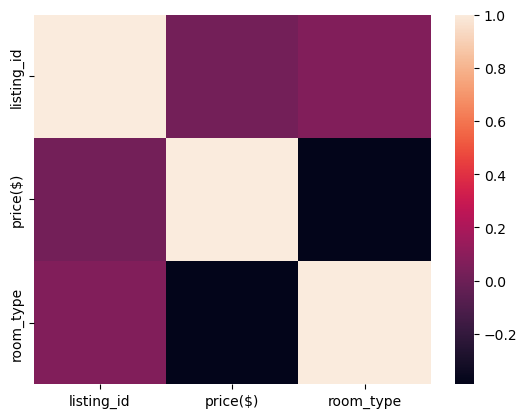

In [17]:
## check correlation
sns.heatmap(airbnb.corr())

In [72]:
airbnb_bckup=airbnb

In [73]:
airbnb_bckup

,listing_id,host_name,last_review,price($),nbhood_full,description,room_type
0,2595,Jennifer,2019-05-21,225.0,"Manhattan, Midtown",Skylit Midtown Castle,0
1,3831,LisaRoxanne,2019-07-05,89.0,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,0
2,5099,Chris,2019-06-22,200.0,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,0
3,5178,Shunichi,2019-06-24,79.0,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,1
4,5238,Ben,2019-06-09,150.0,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,0
...,...,...,...,...,...,...,...
25204,36425863,Rusaa,2019-07-07,129.0,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,1
25205,36427429,H Ai,2019-07-07,45.0,"Queens, Flushing",No.2 with queen size bed,1
25206,36438336,Ben,2019-07-07,235.0,"Staten Island, Great Kills",Seas The Moment,1
25207,36442252,Blaine,2019-07-07,100.0,"Bronx, Mott Haven",1B-1B apartment near by Metro,0


In [74]:
airbnb_bckup=airbnb_bckup.drop(["host_name","nbhood_full",'description'],axis=1)

In [75]:
airbnb_bckup

,listing_id,last_review,price($),room_type
0,2595,2019-05-21,225.0,0
1,3831,2019-07-05,89.0,0
2,5099,2019-06-22,200.0,0
3,5178,2019-06-24,79.0,1
4,5238,2019-06-09,150.0,0
...,...,...,...,...
25204,36425863,2019-07-07,129.0,1
25205,36427429,2019-07-07,45.0,1
25206,36438336,2019-07-07,235.0,1
25207,36442252,2019-07-07,100.0,0


In [76]:
airbnb_bckup['price($)'].describe()

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price($), dtype: float64

### Calculate average price
From the above data minimum price 0 shows that there are free listings and some of the listings have higher range price 75000. 
These are outliers that need to be cleaned up


In [77]:
#check free listing
airbnb_free = airbnb_bckup['price($)']==0.000000

In [78]:
airbnb_free.value_counts()

False    25202
True         7
Name: price($), dtype: int64

In [80]:
airbnb_avg=airbnb_bckup

In [191]:
## Remove all 7 free listings
airbnb_bckup=airbnb_bckup.loc[~airbnb_free]

In [192]:
airbnb_bckup.describe()

,listing_id,price($),room_type
count,2.520200e+04,25202.000000,25202.000000
mean,2.068920e+07,141.817316,0.496826
std,1.103081e+07,147.350650,0.544451
min,2.595000e+03,10.000000,0.000000
25%,1.202115e+07,69.000000,0.000000
50%,2.234547e+07,105.000000,0.000000
75%,3.037697e+07,175.000000,1.000000
max,3.645581e+07,7500.000000,2.000000


In [193]:
#check outlier listing
outlier= airbnb_bckup['price($)']==7500
outlier.value_counts()

False    25201
True         1
Name: price($), dtype: int64

In [194]:
# Remove one outlier listing
airbnb_bckup=airbnb_bckup.loc[~outlier]


In [203]:
airbnb_bckup

,listing_id,last_review,price($),room_type
0,2595,2019-05-21,225.0,0
1,3831,2019-07-05,89.0,0
2,5099,2019-06-22,200.0,0
3,5178,2019-06-24,79.0,1
4,5238,2019-06-09,150.0,0
...,...,...,...,...
25204,36425863,2019-07-07,129.0,1
25205,36427429,2019-07-07,45.0,1
25206,36438336,2019-07-07,235.0,1
25207,36442252,2019-07-07,100.0,0


In [201]:
avg_price =  round(airbnb_bckup['price($)'].mean(),2)

In [202]:
# Print the average price
print("The average price per night for an Airbnb listing in NYC is ${}.".format(avg_price))

The average price per night for an Airbnb listing in NYC is $141.53.


### Split the dataset into training and testing set

In [269]:
X = airbnb_bckup.drop('price($)', axis=1).values
X = airbnb_bckup.drop('last_review', axis=1).values
y = airbnb_bckup['price($)'].values
y = np.log10(y)

### Multiple Linear Regression

In [328]:
from sklearn.model_selection import train_test_split
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xx_train, yy_train)

# Predicting the Test set results
y_pred = lr.predict(Xx_test)

In [329]:
y_pred

array([1.81696745, 2.35809298, 2.08889277, ..., 1.84329139, 2.13140194,
       2.1190381 ])

In [331]:
df = pd.DataFrame({'Actual': np.round(10 ** yy_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,50.0,66.0
1,300.0,228.0
2,100.0,123.0
3,349.0,264.0
4,147.0,142.0
5,600.0,581.0
6,89.0,75.0
7,50.0,65.0
8,68.0,69.0
9,82.0,72.0


In [286]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.04
Price std: 0.29
RMSE: 0.15
R2 score train: 0.78
R2 score test: 0.74


In [287]:
from sklearn.model_selection import StratifiedShuffleSplit
SSS=StratifiedShuffleSplit(n_splits=1,test_size=1/4,random_state=0)

for train_index,test_index in SSS.split(airbnb,airbnb['room_type']):
    train_set=airbnb.loc[train_index]
    test_set=airbnb.loc[test_index]

In [288]:
Xtrain=train_set['room_type']
ytrain=train_set['price($)']
Xtest=test_set['room_type']
ytest=test_set['price($)']

In [289]:
Xtrain=Xtrain.values.reshape(-1,1)
ytrain=ytrain.values.reshape(-1,1)
Xtest=Xtest.values.reshape(-1,1)
ytest=ytest.values.reshape(-1,1)

In [290]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(Xtrain,ytrain)
predict_new=lr.predict(Xtest)

In [324]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print("RMSE: Mean Squared error", mean_squared_error(predict_new, ytest))
print('R2 score test:', np.round(r2_score(predict_new, ytest)))

Price mean: 2.04
Price std: 0.29
RMSE: Mean Squared error 15822.878927996508
R2 score test: -4.0


In [316]:
from sklearn.model_selection import StratifiedShuffleSplit
SSS=StratifiedShuffleSplit(n_splits=1,test_size=0.33,random_state=42)

for train_index,test_index in SSS.split(airbnb,airbnb['room_type']):
    strat_train_set=airbnb.loc[train_index]
    strat_test_set=airbnb.loc[test_index]

In [317]:
X_train=strat_train_set['room_type']
y_train=strat_train_set['price($)']
X_test=strat_test_set['room_type']
y_test=strat_test_set['price($)']

In [299]:
X_train=X_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [300]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
prediction=lr.predict(X_test)

In [327]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print("RMSE: Mean Squared error", mean_squared_error(prediction, y_test))
print('R2 score test:', np.round(r2_score(prediction, y_test)))
from sklearn.model_selection import train_test_split
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


Price mean: 2.04
Price std: 0.29
RMSE: Mean Squared error 24301.073568957363
R2 score test: -6.0


### Random Forest

In [343]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(X, y, test_size = 0.3, random_state = 0)


# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(trainx,trainy)

# Predicting the Test set results
predy = rfr.predict(testx)

In [344]:
df = pd.DataFrame({'Actual': np.round(10 ** testy, 0), 
                   'Predicted': np.round(10 ** predy, 0)})
df.head(10)

,Actual,Predicted
0,50.0,50.0
1,300.0,300.0
2,100.0,100.0
3,349.0,350.0
4,147.0,148.0
5,600.0,598.0
6,89.0,89.0
7,50.0,50.0
8,68.0,68.0
9,82.0,82.0


In [346]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print("RMSE: Mean Squared error", mean_squared_error(predy, testy))
print('R2 score test:', np.round(r2_score(predy, testy)))

Price mean: 2.04
Price std: 0.29
RMSE: Mean Squared error 3.414723560440757e-06
R2 score test: 1.0
